In [1]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('lab10.ok')

Assignment: lab10
OK, version v1.13.11



# Lab 10: Logistic Regression 

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution.

## Due Date

This assignment is due at 11:59pm Tuesday, July 30th.

In this lab you will fit a logistic regression model and evaluate using a few metrics.

# Collaborators  

Write names in this cell:

In [2]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set()
sns.set_context("talk")

In this lab we will be working on the breast cancer dataset. This dataset can be easily loaded using the `sklearn.datasets.load_breast_cancer()` method. The data format is not a `pandas.DataFrame` so we will create a new DataFrame from it.

In [3]:
data = sklearn.datasets.load_breast_cancer()
# data is actually a dictionnary
print(data.keys())
print(data.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Ra

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let us try to fit a simple model with only one feature.

In [5]:
# Define our features/target
X = df[["mean radius"]]
# Target data['target'] = 0 is malignant 1 is benign
Y = (data.target == 0)

In [6]:
# Split between train and test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

print(f"Training Data Size: {len(x_train)}")
print(f"Test Data Size: {len(x_test)}")

Training Data Size: 426
Test Data Size: 143


### Question 1

Let's first fit a logistic regression model using the training set. We will compute the training and testing accuracy, defined as:

$$
\large
\text{Training Accuracy} = \frac{1}{n_{train\_set}} \sum_{i \in \text{train_set}} {\mathbb{1}_{y_i == \hat{y_i}}}
$$

$$
\large
\text{Testing Accuracy} = \frac{1}{n_{test\_set}} \sum_{i \in \text{test_set}} {\mathbb{1}_{y_i == \hat{y_i}}}
$$

where $\hat y_i $ is the prediction of our model, $ y_i $ the true value, and $\mathbb{1}_{y_i == \hat{y_i}}$ an indicator function ($ \mathbb{1}_{y_i == \hat{y_i}} = 1 $ if and only if  $ y_i = \hat{y_i}$).

<!--
BEGIN QUESTION
name: q1
-->

In [10]:
lr = sklearn.linear_model.LogisticRegression(fit_intercept=True)

lr.fit(x_train,y_train)

y_pred_train = lr.predict(x_train) == y_train
y_pred_test = lr.predict(x_test) == y_test
train_accuracy = sum(y_pred_train)/len(y_pred_train)
test_accuracy = sum(y_pred_test)/len(y_pred_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.8732
Test accuracy: 0.9161


In [11]:
ok.grade("q1");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 2
It seems we can a get very high test accuracy. Then how about precision and recall?  
- Precision is the fraction of instances you predicted as 1 that were actually 1.  
- Recall is the fraction of instances are actually 1 that you predicted as 1.

Precision measures the ability of the classifier not to label as positive a sample that is negative, while recall measures the ability of the classifier to find all the positive samples.

A **confusion matrix** helps us visualize/calculate the precision and recall of a classifier. Below, we compute the confusion matrix for our classifier.

We also compute the normalized confusion matrix, which is the same as the confusion matrix, but the numbers are converted to percents (sometimes it's easier to interpret percents as opposed to numbers, especially when the numbers are really big or small).

Confusion matrix, without normalization
[[88  1]
 [11 43]]
Normalized confusion matrix
[[0.98876404 0.01123596]
 [0.2037037  0.7962963 ]]


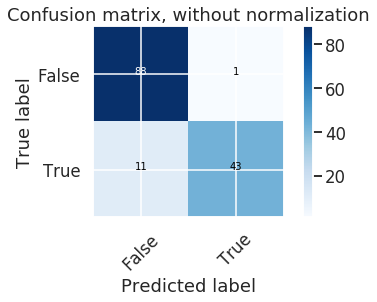

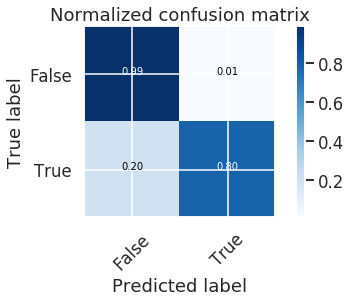

In [12]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, lr.predict(x_test))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['False', 'True']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

Mathematically:
$$
\text{Precision} = \frac{n_{true\_positives}}{n_{true\_positives} + n_{false\_positives}}
$$

$$
\text{Recall} = \frac{n_{true\_positives}}{n_{true\_positives} + n_{false\_negatives}}
$$

As illustrated in the figure below:
![precision_recall](precision_recall.png)

Now let's compute the precision and recall for the test set using the model we got from question 1.  
Please do not use the `sklearn.metrics` for this computation. Instead, use the formulas above.

<!--
BEGIN QUESTION
name: q2
-->

In [13]:
y_pred = lr.predict(x_test) 

precision = sum((y_pred == 1) & (y_test == 1))/sum(y_pred == 1)
recall = sum((y_pred == 1) & (y_test == 1))/(sum((y_pred == 1) & (y_test == 1)) + sum((y_pred == 0) & (y_test == 1)))

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

precision = 0.9773
recall = 0.7963


In [14]:
ok.grade("q2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



What can you infer from these results? Please consider the following plots, that display the distribution of the target variable in the training and testing sets.

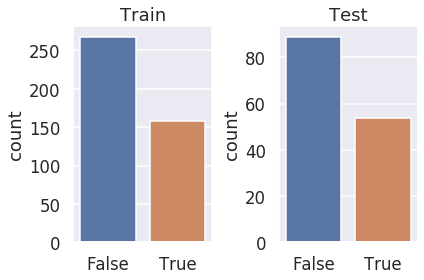

In [15]:
fig, axes = plt.subplots(1, 2)
sns.countplot(y_train, ax=axes[0]);
sns.countplot(y_test, ax=axes[1]);

axes[0].set_title('Train')
axes[1].set_title('Test')
plt.tight_layout();

The precision is high while the recall is relatively low, which shows that it is not a good model in medician since one may not be predicted to have cancer when he/she really has cancer in this case.

###  Question 3
Now let's try to analyze the cross entropy loss. Recall that loss would be:
$$\Large L(\theta) = -\frac{1}{n} \sum_{i=1}^n \left( y_i \log(z_i) + (1 - y_i) \log(1 - z_i)  \right) $$

where $z_i = \sigma(\theta \cdot X_i)$.

In [40]:
theta = np.array([lr.coef_[0][0],
                  lr.intercept_[0]])
X_new = np.hstack([X,
                 np.ones([len(X), 1])]) # This is adding a coefficient of 1 for the intercept term
print(theta)
print()
print(X_new)

[ 0.47565755 -7.22821319]

[[17.99  1.  ]
 [20.57  1.  ]
 [19.69  1.  ]
 ...
 [16.6   1.  ]
 [20.6   1.  ]
 [ 7.76  1.  ]]


In [55]:
theta * X_new

array([[ 8.55707927, -7.22821319],
       [ 9.78427575, -7.22821319],
       [ 9.3656971 , -7.22821319],
       ...,
       [ 7.89591528, -7.22821319],
       [ 9.79854547, -7.22821319],
       [ 3.69110257, -7.22821319]])

Implement the function `lr_loss` which computes the cross-entropy loss. Note that you have been given `sigmoid`, which implements the $\sigma$ function for you.

<!--
BEGIN QUESTION
name: q3
-->

In [62]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def lr_loss(theta, X, Y):
    '''
    Compute the cross entropy loss using Phi, Y and theta. Hint: # The notation B @ v means: 
    compute the matrix multiplication Bv 

    Args:
        theta: The model parameters. 
        Phi: The transformed input data \phi(X)
        Y: The label 

    Return:
        The cross entropy loss.
    '''
    Z = sigmoid( theta @ X.T)
    loss =  - np.mean( Y * np.log(Z) + (1-Y) * np.log(1-Z) )
    return loss

In [63]:
ok.grade("q3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



# You're done! Make sure to submit to okpy.

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

In [64]:
# Save your notebook first, then run this cell to submit.
ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab10.ipynb'.
Submit... 100% complete
Submission successful for user: dizhen@berkeley.edu
URL: https://okpy.org/cal/data100/su19/lab10/submissions/QnE6J9

